# Project: Investigate [TMDb movie](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

The TMDb data set contains information about movies collected from The Movie Database (TMDb) which  including user ratings and revenue. The data set contains 10,000 rows and about 20 columns showing the features like Title, Cast, Overview, Generes, Vote, release_year etc. 

We will use this data set to analyze the following questions 
1. Which Genres are most popular year to year ?
2. What are the properties associated with movies that have high revenues ? 

Also, we will analyze the Independent Variables like - Genere, Director, Year on the revenue and dependent variable 

Note:  The section showing the 'Observation' and 'Next Step' will provide guidance during all stages of our Data Analysis process.


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:

import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

% matplotlib inline


In [2]:

df = pd.read_csv('tmdb-movies.csv')


#### Size of data set (Rows, Columns)

In [3]:
df.shape

(10866, 21)

**Observations:**
    * The dataset has 10,866 Rows and 21 Columns
    
**Next Step:**
    * Explore Rows for any duplicates 

#### Exploring Rows

In [4]:
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

1

**Observations:**
    * 1 Row is duplicated
    
**Next Step:**
    * Check Column and Datatypes 

#### Columns and Datatypes

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
### Column Datatypes

print(75 * "*")   ##Seperator 
for col in df.columns:
    print("%20s = %10s"%(col, df[col].dtypes))


***************************************************************************
                  id =      int64
             imdb_id =     object
          popularity =    float64
              budget =      int64
             revenue =      int64
      original_title =     object
                cast =     object
            homepage =     object
            director =     object
             tagline =     object
            keywords =     object
            overview =     object
             runtime =      int64
              genres =     object
production_companies =     object
        release_date =     object
          vote_count =      int64
        vote_average =    float64
        release_year =      int64
          budget_adj =    float64
         revenue_adj =    float64


**Observations:**
    * The column datatypes looks alright. 
        
**Next Step:**
    * Check for Null Values on these column. 

#### Find columns having nulls

In [7]:

print(75 * "*")   ##Seperator 
for col in df.columns:
    count = df[col].isna().sum()
    if  count > 0:
        print("%20s = %03d"%(col, count))


***************************************************************************
             imdb_id = 010
                cast = 076
            homepage = 7930
            director = 044
             tagline = 2824
            keywords = 1493
            overview = 004
              genres = 023
production_companies = 1030


**Observations:**
    * For this analysis we must consider to remove rows having null in 'genres' column
    * Null value on other columns may not impact our analysis, hence ignore.

**Next Step:**
    * Review Unique Values in Columns 

#### Unique values in Columns

In [8]:
print(75 * "*")   ##Seperator 
for col in df.columns:
    count = df[col].nunique()
    print("%20s = %03d"%(col, count))


***************************************************************************
                  id = 10865
             imdb_id = 10855
          popularity = 10814
              budget = 557
             revenue = 4702
      original_title = 10571
                cast = 10719
            homepage = 2896
            director = 5067
             tagline = 7997
            keywords = 8804
            overview = 10847
             runtime = 247
              genres = 2039
production_companies = 7445
        release_date = 5909
          vote_count = 1289
        vote_average = 072
        release_year = 056
          budget_adj = 2614
         revenue_adj = 4840


**Observations:**
    * Column 'release_year' shows the dataset contains data for 56 years. 
    * Variation in  unique counts in budget(557) and budget_adj(2613) may indicate some issues with the column or not dependeable. Hence can be dropped. 
    * Columns revenue(4702) and revenue_adj(4840) has some variation - Need to investigate.
    * original_title, cast and other columns looks Ok

**Next Step:**
    * Review first few rows of data.

#### Review the first few rows of data 

In [9]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Observations:**
    * Columns that may NOT be useful for the analysis needs to be dropped are - id, imdb_id, release_date
    * Columns revenue, revenue_adj will retained to explore the inflation rate. 
    
**Next Step:**
    * Start Data Cleanup

### Data Cleaning 


From the 'General Properties' section above, we reviewed the dataset, columns and values.  
We made observations to perform cleanups. We will methodically perform the cleanup on Rows, Columns (and provide sufficient details on the cleanup)


1. Drop duplicated rows
2. Drop un-necessary columns.
3. Review dataset features and make improvements

We will start off with Rows and Columns 

#### Drop duplicate rows.

In [10]:
# Start Data Cleanup 

df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

**Observations:**
    * Row count reduced by 1
    
**Next Step:**
    * Drop non-relevant columns

#### Drop non-relevant Columns 

In [11]:
### Drop the columns that will not be useful for the analysis

## Columns that will be Dropped
DropColumns = ['id', 'imdb_id', 'release_date']

## Columans that will be used for Analysis
AnalysisColumns = ['popularity',  'budget', 'revenue', 'original_title','director', 'genres', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj',  'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies']

df.drop(DropColumns, axis=1, inplace=True)
df.columns


Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

**Observations:**
    * 3 Columns dropped.

**Next Step:**
    * Review each feature(listed in the column order above) to make corrections to dataset

#### Review the Features

Based on the Analysis questions, 

1. Which Genres are most popular year to year? 
2. What are the properties associated with movies that have high revenues ?

Some features/Columns seem, and are assumed as critical to our analysis. Such features are 'original_title', 'cast', 'director' etc. So these features will be reviewed and cleaned-up.

Other (Non-critical) Features will be kept as-is and will be cleaned-up on a need basis. These features will be  marked as "Non-critical, Nothing to do"

#### Review the Features  - Popularity

In [12]:
df.popularity.describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

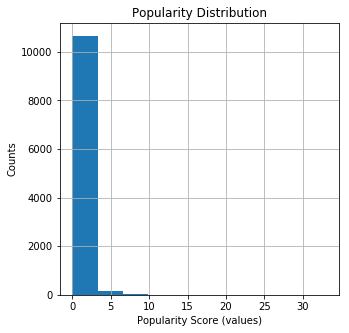

In [13]:
##### Review 'popularity' coulumn values 
#df.popularity.hist();
axes = df.popularity.hist(bins=10, figsize=(5,5));
axes.set_title("Popularity Distribution")
axes.set_xlabel("Popularity Score (values)")
axes.set_ylabel("Counts");


**Observations:**
    * The above Result and graph indicates that there are outliers

**Next Step:**
    * Remove rows having Outliers


In [14]:
### Outlier

Upperlimit_popularity = df.popularity.mean() + 2 * df.popularity.std()
Lowerlimit_popularity = df.popularity.mean() - 2 * df.popularity.std()

Upperlimit_popularity, Lowerlimit_popularity

(2.6469072553654112, -1.3540161455632944)

In [15]:
## Find the count of Outliers rows

len(df[(df.popularity > Upperlimit_popularity) | (df.popularity < Lowerlimit_popularity)])

325

In [16]:
## Remove Outlier rows

print(75 * "*")   ##Seperator 
df = (df[~(df.popularity > Upperlimit_popularity) | (df.popularity < Lowerlimit_popularity)])
df.shape

***************************************************************************


(10540, 18)

**Observations:**
    * Dropped Popularity outlier rows by 325. New row count -> 10540

**Next Step:**
    * Review 'budget' feature.
    

#### Review the Features  - Budget

In [17]:
##### Review 'budget'(and 'budget_adj')
df.budget.describe()

count    1.054000e+04
mean     1.235016e+07
std      2.566344e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.400000e+07
max      4.250000e+08
Name: budget, dtype: float64

**Observations:**
    * The Min value shows '0.0'. This seems to be incorrect for the Movie dataset. 

**Next Step:**
    * As budget_adj is derieved from budget, analyze  the number of rows having 'budget' & 'budget_adj' = 0.0


In [18]:

#### Check where the budget = 0.0
budget_0_count = len(df[(df.budget == 0.0)])

#### Check where the budget_adj = 0.0
budget_adj_0_count = len(df[(df.budget_adj == 0.0)])

#### Check where the budget & budget_adj  = 0.0
budget_both_0_count = len(df[(df.budget == 0.0) & (df.budget_adj == 0.0)])

print(budget_0_count, budget_adj_0_count,budget_both_0_count )


5691 5691 5691


**Observations:**
    * Looks like 5691 rows will be dropped from the dataset. So the dataset will be reduced to 46% (10540 - 5691). 
    
    *** Dropping so many rows may negatively impact our Analysis.  
    *** On furher thinking, it appears that 'budget' and 'budget_adj' may not be needed in our analysis. Since we already can use Outlier for identifying the the highest revenue rows.

**Next Step:**
    * Drop 'budget' or 'budget_adj columns

In [19]:
print(75 * "*")   ##Seperator 
print("########## DROP 'budget' columns ###############")

df.drop(['budget', 'budget_adj'], axis=1, inplace=True)
df.columns

***************************************************************************
########## DROP 'budget' columns ###############


Index(['popularity', 'revenue', 'original_title', 'cast', 'homepage',
       'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'vote_count', 'vote_average', 'release_year',
       'revenue_adj'],
      dtype='object')

**Observations:**
    * Budget columns dropped 

**Next Step:**
    * Review 'revenue' feature.


#### Review the Features  - Revenue

In [20]:
##### Review 'revenue'  coulumn values 
df.revenue.describe()

count    1.054000e+04
mean     2.834432e+07
std      7.421679e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.893376e+07
max      1.123747e+09
Name: revenue, dtype: float64

**Observations:**
    * The Min value shows '0.0'. This seems to be incorrect for the Movie dataset. As 'revenue_adj' is derieved from 'revenue', lets eleminate these rows.

**Next Step:**
    * Analyze for the number of rows having revenue = 0.0 

In [21]:
## Remove rows where revenue is 0.0

#### Check where the revenue = 0.0
revenue_0_count = len(df[(df.revenue == 0.0)])

#### Check where the revenue_adj = 0.0
revenue_adj_0_count = len(df[(df.revenue_adj == 0.0)])

#### Check where the revenue & revenue_adj  = 0.0
revenue_both_0_count = len(df[(df.revenue == 0.0) & (df.revenue_adj == 0.0)])

print(revenue_0_count, revenue_adj_0_count, revenue_both_0_count )

6012 6012 6012


**Observations:**
    * AS for this analysis, we cannot assume Revenue, looks like 6012 rows must be dropped from the dataset. 

**Next Step:**
    * Drop rows where 'revenue' & 'revenue_adj' columns == 0.0

In [22]:
print(75 * "*")   ##Seperator 
print("########## DROP 'revenue' rows == 0 ############")

df = df.query('(revenue != "0.0") & (revenue_adj != "0.0")')
df.shape

***************************************************************************
########## DROP 'revenue' rows == 0 ############


(4528, 16)

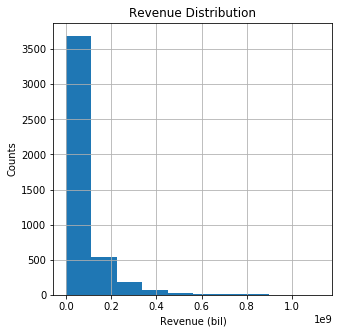

In [23]:
axes = df.revenue.hist(bins=10, figsize=(5,5));
axes.set_title("Revenue Distribution")
axes.set_xlabel("Revenue (bil)")
axes.set_ylabel("Counts");

**Observations:**
    * Updated Row count is 4528

**Next Step:**
    * Review other Features.

#### Review the Features  - original_title

In [24]:
## Check if column has null

df.original_title.isna().sum()


0

**Observations:**
    * Has 0 Null

**Next Step:**
    * Check for unique values.

In [25]:
len(df)

4528

In [26]:
## Check out how many dupliate titles exist

print(75 * "*")   ##Seperator 
len(df), df.original_title.nunique(), len(df) - df.original_title.nunique()

***************************************************************************


(4528, 4467, 61)

**Observations:**
    * Shows that there are 61 Duplicate titles  

**Next Step:**
    * Remove duplicate titles rows

In [27]:
df.drop_duplicates(subset=['original_title'], inplace=True)

len(df), df.original_title.nunique(), len(df) - df.original_title.nunique()


(4467, 4467, 0)

**Observations:**
    * Dropped 61 original_title rows  

**Next Step:**
    * Review other features

#### Review the Features  - cast

In [28]:
## Check if column has null

df.cast.isna().sum()


5

**Observations:**
    * Has 5 rows with Null in cast feature.

**Next Step:**
    * Drop rows having Null 'cast' 

In [29]:
df.dropna(axis=0, subset=['cast'], inplace=True)
df.shape

(4462, 16)

**Observations:**
    * 5 Rows removed.

**Next Step:**
    * Review other features 

#### Review the Features  - homepage

In [30]:
print(75 * "*")   ##Seperator 
print("\n### Non-critical, Nothing to do ###\n")

***************************************************************************

### Non-critical, Nothing to do ###



#### Review the Features  - director

In [31]:
## Check if column has null

df.director.isna().sum()


1

**Observations:**
    * Has 1 rows with Null in director feature.

**Next Step:**
    * Drop rows having Null 'director' 

In [32]:
df.dropna(axis=0, subset=['director'], inplace=True)
df.shape

(4461, 16)

**Observations:**
    * 1 Rows removed.

**Next Step:**
    * Review other features 

#### Review the Features  - tagline

In [33]:
print(75 * "*")   ##Seperator 
print("\n### Non-critical, Nothing to do ###\n")

***************************************************************************

### Non-critical, Nothing to do ###



#### Review the Features  - keywords

In [34]:
print(75 * "*")   ##Seperator 
print("\n### Non-critical, Nothing to do ###\n")

***************************************************************************

### Non-critical, Nothing to do ###



#### Review the Features  - overview

In [35]:
print(75 * "*")   ##Seperator 
print("\n### Non-critical, Nothing to do ###\n")

***************************************************************************

### Non-critical, Nothing to do ###



#### Review the Features  - runtime

In [36]:
df.runtime.describe()

count    4461.000000
mean      107.007397
std        20.740013
min        15.000000
25%        94.000000
50%       104.000000
75%       116.000000
max       705.000000
Name: runtime, dtype: float64

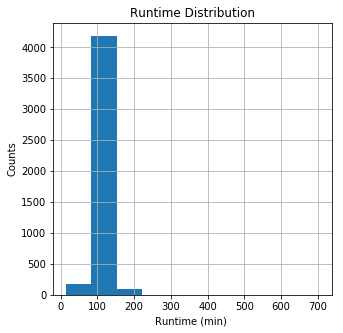

In [37]:
axes = df.runtime.hist(bins=10, figsize=(5,5));
axes.set_title("Runtime Distribution")
axes.set_xlabel("Runtime (min) ")
axes.set_ylabel("Counts");

**Observations:**
    * Runtime seems to have some outliers.  The Max value(705) indicates 11 hour movie, which sees abnormal

**Next Step:**
    * Review outliers.

In [38]:
### Outlier
print(75 * "*")   ##Seperator 
Upperlimit_runtime = df.runtime.mean() + 3 * df.runtime.std()
Lowerlimit_runtime = df.runtime.mean() - 3 * df.runtime.std()
Upperlimit_runtime, Lowerlimit_runtime

#len(df[(df.runtime > Upperlimit_runtime) | (df.runtime < Lowerlimit_runtime)])
#df = df[~(df.runtime > Upperlimit_runtime) | (df.runtime < Lowerlimit_runtime)]
#df.shape


***************************************************************************


(169.22743733435004, 44.787357554688285)

In [39]:
len(df[(df.runtime > Upperlimit_runtime) | (df.runtime < Lowerlimit_runtime)])


55

In [40]:
## See the titles of the movies and compare with data from the Web.


df[(df.runtime > Upperlimit_runtime) | (df.runtime < Lowerlimit_runtime)]

,popularity,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_adj
1335,1.048838,50750000,A Bridge Too Far,Dirk Bogarde|James Caan|Michael Caine|Sean Con...,NaN,Richard Attenborough,Out of the sky comes the screen's most incredi...,netherlands|world war ii|operation market gard...,Tells the story of operation Market Garden. A ...,175,Drama|History|War,Joseph E. Levine Productions,109,6.4,1977,1.825874e+08
1486,0.816681,70000000,3 Idiots,Aamir Khan|Kareena Kapoor|Madhavan|Sharman Jos...,http://idiotsacademy.zapak.com/idiotsmain.php,Rajkumar Hirani,Don't BE A STUPID BE AN I.D.I.O.T.,suicide|suicide attempt|college|friends|engine...,In the tradition of â€œFerris Buellerâ€™s Day ...,170,Drama|Comedy|Romance,Vidhu Vinod Chopra Productions,662,7.8,2009,7.114803e+07
2107,0.534192,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,NaN,Olivier Assayas,The man who hijacked the world,gun|car bomb|tv mini-series|terrorism|opec,"The story of Venezuelan revolutionary, Ilich R...",338,Crime|Drama|Thriller|History,Egoli Tossell Film AG|Canal+|Arte France|Films...,35,6.2,2010,8.712790e+05
2469,0.682531,48451803,Magnolia,Julianne Moore|William H. Macy|John C. Reilly|...,http://www.magnoliamovie.com/,Paul Thomas Anderson,Things fall down. People look up. And when it ...,farewell|regret|parents kids relationship|suic...,An epic mosaic of many interrelated characters...,188,Drama,New Line Cinema|Ghoulardi Film Company|The Mag...,430,7.3,1999,6.342597e+07
2642,2.478879,449220945,Pearl Harbor,Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...,NaN,Michael Bay,"December 7, 1941 - A day that shall live in in...",nurse|patriotism|hawaii|world war ii|pilot,The lifelong friendship between Rafe McCawley ...,183,History|Romance|War,Jerry Bruckheimer Films|Touchstone Pictures,1044,6.6,2001,5.532103e+08
2722,0.537593,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,world war ii|us army|war|paratroops|combat,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,313,8.0,2001,1.539360e+08
2741,0.453846,4099000,Dil Chahta Hai,Aamir Khan|Saif Ali Khan|Akshaye Khanna|Preity...,http://www.excelmovies.com/,Farhan Akhtar,Welcome to a summer of their lives you will ne...,NaN,Three inseparable childhood friends are just o...,183,Drama|Romance,Excel Entertainment,32,7.3,2001,5.047870e+06
3110,0.389554,13000000,Jodhaa Akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,http://www.jodhaaakbar.com/,Ashutosh Gowariker,NaN,wife husband relationship|emperor|hindu|marria...,Jodhaa Akbar is a sixteenth century love story...,213,Action|Adventure|Drama|Foreign|History,UTV Motion Pictures|Ashutosh Gowariker Product...,48,7.8,2008,1.316623e+07
3235,0.215030,76000000,Ghajini,Aamir Khan|Asin Thottumkal|Jiah Khan|Pradeep R...,http://www.rememberghajini.com/,A.R. Murugadoss,NaN,tattoo|short-term memory,Sanjay a rich tycoon suffering from short term...,183,Action|Drama|Foreign|Mystery|Thriller,NaN,53,6.9,2008,7.697178e+07
3239,0.352054,3,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,http://www.drhorrible.com,Joss Whedon,He has a Ph.D. in horribleness!,musical|supervillain,"Dr. Horrible, an aspiring supervillain with hi...",42,Adventure|Action|Comedy|Science Fiction|Music,NaN,140,7.7,2008,3.038360e+00


**Observations:**
    * The Max Runtime (705) appears to be a Series and is Valid. Nothing to do for 'runtime' 

**Next Step:**
    * Review other features. 

#### Review the Features  - production_companies

In [41]:
## Check if column has null

df.production_companies.isna().sum()


92

**Observations:**
    * Has 92 rows with Null in production_companies feature.

**Next Step:**
    * Drop rows having Null 'production_companies' 

In [42]:
df.dropna(axis=0, subset=['production_companies'], inplace=True)
df.shape

(4369, 16)

In [43]:
df.production_companies.head()

54    Studio Babelsberg|Alcon Entertainment|DMG Ente...
55    Double Feature Films|PeaPie Films|3 Arts Enter...
56        Endgame Entertainment|Ram Bergman Productions
57    Lionsgate|Mad Chance|OddLot Entertainment|Huay...
58    Pretty Pictures|Working Title Films|ArtÃ©mis P...
Name: production_companies, dtype: object

**Observations:**
    * 92 Rows removed.

**Next Step:**
    * Review other features 

#### Review the Features  - vote_count

In [44]:
df.vote_count.describe()

count    4369.000000
mean      292.374456
std       430.900038
min        10.000000
25%        46.000000
50%       134.000000
75%       352.000000
max      7080.000000
Name: vote_count, dtype: float64

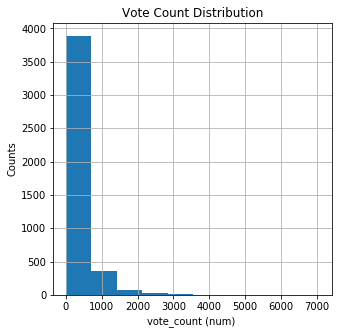

In [45]:
axes = df.vote_count.hist(bins=10, figsize=(5,5));
axes.set_title("Vote Count Distribution")
axes.set_xlabel("vote_count (num) ")
axes.set_ylabel("Counts");

**Observations:**
    * The Max vote is very large. Lets check for Outliers

**Next Step:**
    * Check for Outliers, review the movie titles to ensure they are popular movies.

In [46]:
### Outlier
print(75 * "*")   ##Seperator 
Upperlimit_vote_count = df.vote_count.mean() + 5 * df.vote_count.std()
Lowerlimit_vote_count = df.vote_count.mean() - 5 * df.vote_count.std()
Upperlimit_vote_count, Lowerlimit_vote_count
len(df[(df.vote_count > Upperlimit_vote_count) | (df.vote_count < Lowerlimit_vote_count)])

***************************************************************************


27

In [47]:
df[(df.vote_count > Upperlimit_vote_count) | (df.vote_count < Lowerlimit_vote_count)]

,popularity,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,vote_count,vote_average,release_year,revenue_adj
1644,0.391859,341131793,X-Men Origins: Wolverine,Hugh Jackman|Liev Schreiber|Danny Huston|Lynn ...,http://www.x-menorigins.com/,Gavin Hood,Witness the Origin.,corruption|mutant|boxer|army|marvel comic,"After seeking to live a normal life, Logan set...",107,Adventure|Action|Thriller|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2784,6.2,2009,3.467265e+08
1935,2.225609,96188903,Kick-Ass,Aaron Taylor-Johnson|ChloÃ« Grace Moretz|Chris...,NaN,Matthew Vaughn,Shut up. Kick ass.,flying|confession|crime fighter|secret identit...,Dave Lizewski is an unnoticed high school stud...,117,Action|Crime,Lions Gate,3085,7.0,2010,9.618890e+07
2641,2.642249,450717150,Ocean's Eleven,George Clooney|Brad Pitt|Matt Damon|Andy GarcÃ...,http://www.warnerbros.co.uk/movies/oceans-eleven,Steven Soderbergh,Are you in or out?,prison|pickpocket|strip club|con artist|atlant...,"Less than 24 hours into his parole, charismati...",116,Thriller|Crime,Village Roadshow Pictures|Section Eight|NPV En...,2645,7.0,2001,5.550528e+08
2753,0.414311,207283925,The Fast and the Furious,Paul Walker|Vin Diesel|Michelle Rodriguez|Jord...,NaN,Rob Cohen,Live life 1/4 mile at a time.,street gang|car race|undercover|auto-tuning|lo...,Domenic Toretto is a Los Angeles street racer ...,106,Action|Crime|Thriller,Universal Pictures|Original Film|Ardustry Ente...,2505,6.4,2001,2.552677e+08
3392,2.579776,334615000,Sherlock Holmes: A Game of Shadows,Robert Downey Jr.|Jude Law|Jared Harris|Noomi ...,http://sherlockholmes2.warnerbros.com/index.html,Guy Ritchie,The Game is Afoot.,detective inspector|steampunk|criminal mastermind,There is a new criminal mastermind at large--P...,129,Adventure|Action|Crime|Mystery,Village Roadshow Pictures|Silver Pictures|Lin ...,2710,6.9,2011,3.243751e+08
3395,2.411533,254455986,The Hangover Part II,Bradley Cooper|Ed Helms|Zach Galifianakis|Just...,http://hangoverpart2.warnerbros.com/,Todd Phillips,The Wolfpack Is Back,sun glasses|interpol|undercover cop|hangover|d...,The Hangover crew heads to Thailand for Stu's ...,102,Comedy,Legendary Pictures|Living Films|Green Hat Film...,2601,6.1,2011,2.466691e+08
3522,0.760503,1123746996,Transformers: Dark of the Moon,Shia LaBeouf|John Malkovich|Ken Jeong|Frances ...,http://www.transformersmovie.com/,Michael Bay,The invasion we always feared. An enemy we nev...,moon|spacecraft|traitor|bodyguard|fighter jet,Sam Witwicky takes his first tenuous steps int...,154,Action|Science Fiction|Adventure,Paramount Pictures|Di Bonaventura Pictures|Has...,2456,6.1,2011,1.089358e+09
3801,0.164515,344420111,X-Men: First Class,James McAvoy|Michael Fassbender|Jennifer Lawre...,http://www.x-menfirstclassmovie.com/,Matthew Vaughn,Witness the moment that will change our world.,cia|mutant|mine|marvel comic|based on comic book,Before Charles Xavier and Erik Lensherr took t...,132,Action|Science Fiction|Adventure,Ingenious Film Partners|Ingenious Media|Twenti...,3651,7.0,2011,3.338802e+08
4381,2.592896,624026776,Men in Black 3,Will Smith|Tommy Lee Jones|Josh Brolin|Michael...,http://www.sonypictures.com/movies/meninblack3/,Barry Sonnenfeld,They are back... in time.,time travel|time machine|alien|fictional gover...,Agents J (Will Smith) and K (Tommy Lee Jones) ...,106,Action|Comedy|Science Fiction,Amblin Entertainment|Media Magik Entertainment...,3142,6.1,2012,5.926659e+08
4382,2.571099,691210692,The Hunger Games,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,http://www.thehungergames.movie/,Gary Ross,May The Odds Be Ever In Your Favor.,hallucination|dystopia|female protagonist|bow ...,Every year in the ruins of what was once North...,142,Science Fiction|Adventure|Fantasy,Lionsgate|Color Force,7080,6.7,2012,6.564734e+08


**Observations:**
    * Reviewed the (outlier) movie titles and confirming that they were popular movies.  So no cleanup required.

**Next Step:**
    * Check for Outliers, review the movie titles to ensure they are popular movies.

In [48]:
#df = df[~(df.vote_count > Upperlimit_vote_count) | (df.vote_count < Lowerlimit_vote_count)]
df.shape


(4369, 16)

**Observations:**
    * 

**Next Step:**
    * Explore other Features

#### Review the Features  - vote_average

In [49]:
df.vote_average.describe()

count    4369.000000
mean        6.090936
std         0.773067
min         2.100000
25%         5.600000
50%         6.100000
75%         6.600000
max         8.400000
Name: vote_average, dtype: float64

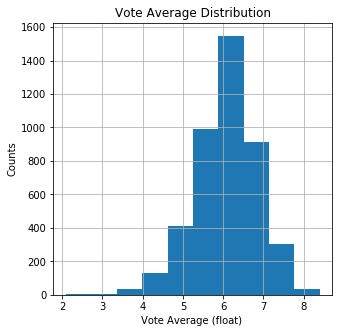

In [50]:
axes = df.vote_average.hist(bins=10, figsize=(5,5));
axes.set_title("Vote Average Distribution")
axes.set_xlabel("Vote Average (float) ")
axes.set_ylabel("Counts");

In [51]:
### Outlier
print(75 * "*")   ##Seperator 
Upperlimit_vote_average = df.vote_average.mean() + 3 * df.vote_average.std()
Lowerlimit_vote_average = df.vote_average.mean() - 3 * df.vote_average.std()
Upperlimit_vote_average, Lowerlimit_vote_average

#len(df[(df.vote_average > Upperlimit_vote_average) | (df.vote_average < Lowerlimit_vote_average)])
#df[(df.vote_average > Upperlimit_vote_average) | (df.vote_average < Lowerlimit_vote_average)]

df = df[~(df.vote_average > Upperlimit_vote_average) | (df.vote_average < Lowerlimit_vote_average)]
df.shape


***************************************************************************


(4369, 16)

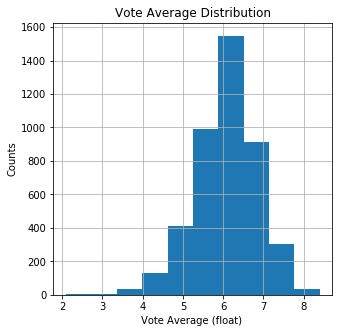

In [52]:
axes = df.vote_average.hist(bins=10, figsize=(5,5));
axes.set_title("Vote Average Distribution")
axes.set_xlabel("Vote Average (float) ")
axes.set_ylabel("Counts");

**Observations:**
    * vote_average seems normalized.

**Next Step:**
    * Explore other Features

#### Review the Features  - release_year

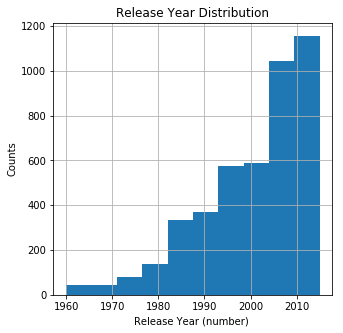

In [53]:
axes = df.release_year.hist(bins=10, figsize=(5,5));
axes.set_title("Release Year Distribution")
axes.set_xlabel("Release Year (number) ")
axes.set_ylabel("Counts");

**Observations:**
    * The graph shows Movies data starts around 1960 and gradually increasing data over the years. 

**Next Step:**
    * Explore other Features

#### Review the Features  - revenue_adj

In [54]:
df.revenue_adj.describe()

count    4.369000e+03
mean     9.205945e+07
std      1.449136e+08
min      2.370705e+00
25%      1.000849e+07
50%      4.030809e+07
75%      1.101094e+08
max      2.167325e+09
Name: revenue_adj, dtype: float64

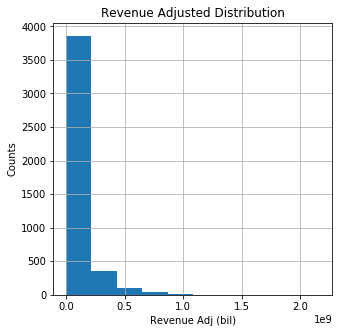

In [55]:
axes = df.revenue_adj.hist(bins=10, figsize=(5,5));
axes.set_title("Revenue Adjusted Distribution")
axes.set_xlabel("Revenue Adj (bil)")
axes.set_ylabel("Counts");

**Observations:**
    * The feature has valid revenue adjusted values.

**Next Step:**
    * Review any issues with coorelation of revenue to revenue_adj

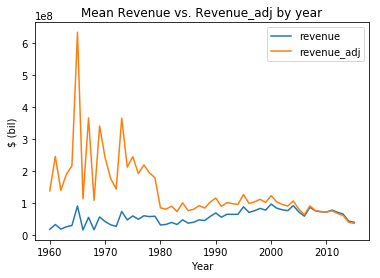

In [56]:
## Identify any issues by doing a series graph to see the coorelation of 'revenue' and 'revenue_adj' 

#### Year
x  = list(df.groupby(by=['release_year'], group_keys=True,sort=True,as_index=False).revenue.mean().iloc[:,0])

#### revenue
y1 = list(df.groupby(by=['release_year'], group_keys=True,sort=True,as_index=False).revenue.mean().iloc[:,1])

#### revenue_adj
y2 = list(df.groupby(by=['release_year'], group_keys=True,sort=True,as_index=False).revenue_adj.mean().iloc[:,1])


df2=pd.DataFrame({'x': x, 'y1': y1, 'y2':y2 })
plt.plot(x, y1,label="revenue")
plt.plot(x, y2,label="revenue_adj")
plt.title('Mean Revenue vs. Revenue_adj by year')
plt.xlabel('Year')
plt.ylabel('$ (bil)')

plt.legend();


**Observations:**
    * The graph trend shows matching coorrelation of the 2 features.

**Next Step:**
    * Explore other Features

#### Review the Features  - genres

In [57]:
## Check if column has null

df.genres.isna().sum()


0

**Observations:**
    * 0 rows have null value

**Next Step:**
    * Review the column data.

In [58]:
print(75 * "*")   ##Seperator 
df.shape

***************************************************************************


(4369, 16)

**Observations:**
    * Row count - 4369

**Next Step:**
    * Review the column data.

In [59]:
df['genres'].head()

54               Action|Crime|Thriller
55                               Drama
56    Science Fiction|Mystery|Thriller
57                    Comedy|Adventure
58                               Drama
Name: genres, dtype: object

**Observations:**
    * Multiple Genre values seperated by '|' are stored for each movie row

**Next Step:**
    * Explode the dataset such that new rows are created with individual genere for the row

In [60]:
### First lets take a backup of the Un-exploded dataset

df_unexploded = df.copy()

### START11
df_unexploded.to_csv('cleanup_11.csv', index=False)
df_unexploded = pd.read_csv('cleanup_11.csv')
df_unexploded.shape

(4369, 16)

** Tried using Pandas built-in methods to leverage Exploding the data. See Appendix section in the end)

Due to challenges created the below Python method/steps

In [61]:
### Explode



#### These steps will parse the genres column and split by '|' and, will create clone the rows with the individual genre.

print(75 * "*")   ##Seperator 
df_new = pd.DataFrame()

for i in range(len(df.index)):
    df_row = df.iloc[i].copy()
    genres = df.iloc[i,10]
    #print(i, genres)
    if genres.count('|') != 0:
        for genre in set(genres.split('|')):
            #print(genre.strip())    
            df_row['genres'] = genre
            df_new = df_new.append(df_row,ignore_index=True)
            #print(df_row)
    else:
        df_new = df_new.append(df_row,ignore_index=True)

df = df_new
df.shape


***************************************************************************


(11302, 16)

In [62]:
df['genres'].head()

0      Action
1    Thriller
2       Crime
3       Drama
4    Thriller
Name: genres, dtype: object

**Observations:**
    * Genere column shows individual genere per row. 
    * Update Row count -> 11302

**Next Step:**
    * Review the summary of the cleaned-up data.

In [63]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11302 entries, 0 to 11301
Data columns (total 16 columns):
cast                    11302 non-null object
director                11302 non-null object
genres                  11302 non-null object
homepage                3488 non-null object
keywords                10780 non-null object
original_title          11302 non-null object
overview                11302 non-null object
popularity              11302 non-null float64
production_companies    11302 non-null object
release_year            11302 non-null float64
revenue                 11302 non-null float64
revenue_adj             11302 non-null float64
runtime                 11302 non-null float64
tagline                 10349 non-null object
vote_average            11302 non-null float64
vote_count              11302 non-null float64
dtypes: float64(7), object(9)
memory usage: 1.4+ MB


In [64]:
# df.isnull().sum()
print(75 * "*")   ##Seperator 
for col in df.columns:
    count = df[col].isna().sum()
    if  count > 0:
        print("%20s = %03d"%(col, count))

***************************************************************************
            homepage = 7814
            keywords = 522
             tagline = 953


**Observations:**
    * Only the 'homepage', keywords and tagline seem to have null. 
    *** After further analysis we can make judgement to handle these null rows 

**Next Step:**
    * Save the dataset to perform Exploratory Data Analysis

In [65]:
### START10
df.to_csv('cleanup_10.csv', index=False)
import pandas as pd
% matplotlib inline


df = pd.read_csv('cleanup_10.csv')
df.shape


(11302, 16)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which Genres are most popular year to year?

Steps:
    1. Group the dataset by 'release_year' & 'genres' and, find 'mean' popularity score of the group
    2. Identify the max popularity in each group to represent the genre popular during the year.

##### Step 1: Group thee dataset by 'release_year' & 'genres' and, find 'mean' popularity score of the group

In [66]:

cols = ['release_year','genres']

## Save in the df_new

df_new = df.groupby(by=cols,group_keys=True,sort=True,as_index=False).popularity.mean()


##### Step 2: Identify the max popularity in each group to represent the genre popular during the year.

In [67]:
## Iterate through the df_new rows, and keep a running tally of the current_year, maximum_genres, and max_popularity 
#### and, when the year changes, print it out the Max Genres and Max Popularity

print(75 * "*")   ##Seperator 


curr_yr = ''            # Variable: Current_Year
max_popularity = ''     # Variable: Maximum_Popularity
max_genres = ''         # Variable: Maximum_Genres


print("\n\tTABLE 1: Genres popular each year\n")

print("%s | %20s | %20s"%("Year", "Genres", "Popularity(in year)"))
print("%s | %20s | %20s"%("----", "------", "-------------------"))

for index, row in df_new.iterrows():
    if curr_yr =='':
        ## First time, assign the first row of values  
        curr_yr = row['release_year']
        max_genres =  row['genres']        
        max_popularity =  row['popularity']
        continue
    
    ## if the 'year' from the new row matches with current_year
    if curr_yr == row['release_year']:
        ## Check Max value
        if row['popularity'] > max_popularity:
            max_genres = row['genres']
            max_popularity = row['popularity']

    ## if the 'year' from the new row DOES NOT matches with current_year
    ## then print out
    else:
        ## print out 
        print("%d | %20s | %2.5f"%(curr_yr, max_genres,max_popularity))
        curr_yr = row['release_year']
        max_genres =  row['genres']        
        max_popularity =  row['popularity']

print("%d | %20s | %2.5f"%(curr_yr, max_genres,max_popularity))



***************************************************************************

	TABLE 1: Genres popular each year

Year |               Genres |  Popularity(in year)
---- |               ------ |  -------------------
1960 |            Adventure | 1.87213
1961 |            Animation | 2.63199
1962 |              History | 1.16877
1963 |            Adventure | 1.58628
1964 |                  War | 2.21048
1965 |             Thriller | 1.91047
1966 |                Drama | 0.48509
1967 |            Animation | 2.55070
1968 |               Horror | 0.72453
1969 |               Action | 1.77875
1970 |            Animation | 1.93696
1971 |               Family | 2.43067
1972 |      Science Fiction | 0.88181
1973 |               Horror | 2.01073
1974 |      Science Fiction | 1.04996
1975 |               Horror | 1.98657
1976 |                Drama | 1.17531
1977 |               Family | 1.23532
1978 |                Crime | 0.80139
1979 |                  War | 2.31952
1980 |                Mus

### Q2: Properties associate with movies that have high revenues

Steps:
    1. Create 2 datasets by identfing the rows showing Highest revenue and Normal revenue.
    2. Graph to compare the Mean score of Independent features between the above 2 datasets.
    3. Show Feature importance

#### Step1: Create 2 datasets by identfing the rows showing Highest revenue and Normal revenue

In [68]:
# First Describe the revenue_adj column to see the mean, and std. 

df.revenue_adj.describe()


count    1.130200e+04
mean     1.016621e+08
std      1.561478e+08
min      2.370705e+00
25%      1.241401e+07
50%      4.481418e+07
75%      1.247995e+08
max      2.167325e+09
Name: revenue_adj, dtype: float64

In [69]:
## Find the upper limit for revenue_adj column

Upperlimit_revenue_adj = df.revenue_adj.mean() + 2 * df.revenue_adj.std()
Upperlimit_revenue_adj


413957606.82807934

In [70]:

##### Create 2 datasets(df_highest_revenue_adj,df_normal_revenue_adj) by identfing the rows showing Highest revenue 
#####  and Normal revenue

##### The outlier rows of revenue for the original dataset would become the 'Highest revenue' dataset and, 
#####   the NON-Outlier would become the 'Normal revenue' dataset.

print(75 * "*")   ##Seperator 
## Find the outliner (Upperlimit) revenue 
Upperlimit_revenue_adj = df.revenue_adj.mean() + 2 * df.revenue_adj.std()

### So,
## Highest revenue dataset
df_highest_revenue_adj = df[df.revenue_adj >= Upperlimit_revenue_adj]

## Normal revenue dataset
df_normal_revenue_adj  = df[df.revenue_adj < Upperlimit_revenue_adj]

len(df_highest_revenue_adj), len(df_normal_revenue_adj)


***************************************************************************


(532, 10770)

**Observations:**
    * There are 532 rows showing outliers indicating the highest revenue_adj. And, 10770 rows showing normal revenue_adj

**Next Step:**
    * Plot graph to study the properties in the highest revenue_adj dataset

#### Step2: Graph to compare the Mean score of Independent features between the above 2 datasets.

##### Step 2a : Show the mean() for the Independent Features.

In [71]:
## For the **Highest Revenue_adj** dataset

df_highest_revenue_adj.mean()

popularity      1.615879e+00
release_year    1.993680e+03
revenue         4.023795e+08
revenue_adj     6.286319e+08
runtime         1.208177e+02
vote_average    6.440226e+00
vote_count      1.057177e+03
dtype: float64

In [72]:
## For the **Normal Revenue_adj** dataset

df_normal_revenue_adj.mean()

popularity      7.886988e-01
release_year    2.000338e+03
revenue         5.823848e+07
revenue_adj     7.563161e+07
runtime         1.068867e+02
vote_average    6.048050e+00
vote_count      2.752601e+02
dtype: float64

##### Step 2b : Show the Bar graph to compare Independent features.

***************************************************************************

	GRAPH 1: Compare Mean values for Features



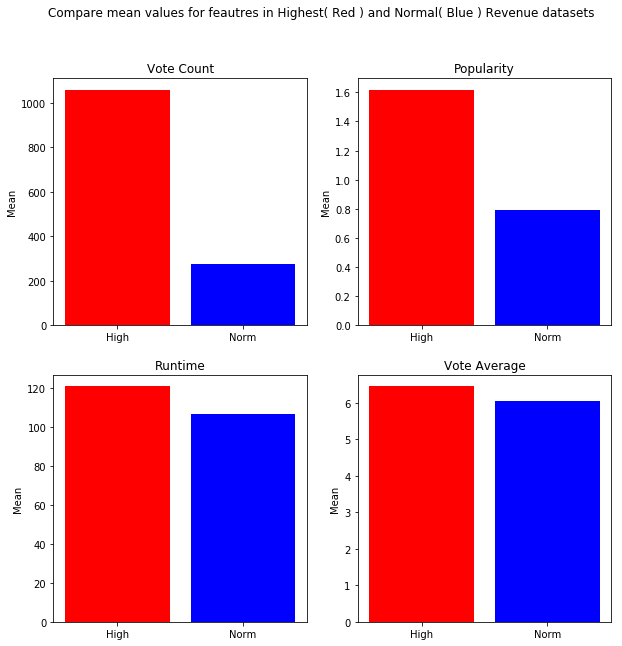

In [73]:

#### Compare Bar graph showing the mean of Independent features between the 'highest revenue_adj' and 'normal revenue_adj'

#### Compare Vote

print(75 * "*")   ##Seperator 

import numpy as np
import matplotlib.pyplot as plt

data_vote_count = [
        [df_highest_revenue_adj.vote_count.mean()], 
        [df_normal_revenue_adj.vote_count.mean()]
       ]

data_popularity = [
        [df_highest_revenue_adj.popularity.mean()], 
        [df_normal_revenue_adj.popularity.mean()]
       ]

data_release_year = [
        [df_highest_revenue_adj.release_year.mean()], 
        [df_normal_revenue_adj.release_year.mean()]
       ]

data_runtime = [
        [df_highest_revenue_adj.runtime.mean()], 
        [df_normal_revenue_adj.runtime.mean()]
       ]
       
       
data_vote_average = [
        [df_highest_revenue_adj.vote_average.mean()], 
        [df_normal_revenue_adj.vote_average.mean()]
       ]

       
X = 0

fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Compare mean values for feautres in Highest( Red ) and Normal( Blue ) Revenue datasets ')
plt.setp(ax,  xticks=[0.0, 0.3],xticklabels=['High', 'Norm'])


ax[0,0].bar(X + 0.00, data_vote_count[0], color = 'r', width = 0.25)
ax[0,0].bar(X + 0.30, data_vote_count[1], color = 'b', width = 0.25)
ax[0,0].set_title('Vote Count')


ax[0,1].bar(X + 0.00, data_popularity[0], color = 'r', width = 0.25)
ax[0,1].bar(X + 0.30, data_popularity[1], color = 'b', width = 0.25)
ax[0,1].set_title('Popularity')


ax[1,0].bar(X + 0.00, data_runtime[0], color = 'r', width = 0.25)
ax[1,0].bar(X + 0.30, data_runtime[1], color = 'b', width = 0.25)
ax[1,0].set_title('Runtime')

ax[1,1].bar(X + 0.00, data_vote_average[0], color = 'r', width = 0.25)
ax[1,1].bar(X + 0.30, data_vote_average[1], color = 'b', width = 0.25)
ax[1,1].set_title('Vote Average')



for axs in ax.flat:
    axs.set(xlabel='', ylabel='Mean')

    
print("\n\tGRAPH 1: Compare Mean values for Features\n")



**Observations:**
    * Highest revenue_adj datasets have have Higher mean for  'Vote Count' and 'Popularity'

**Next Step:**
    * Plot graph to study the properties in the highest revenue dataset

In [74]:

# pd.plotting.scatter_matrix(df_highest_revenue, figsize=(30,30));


#### Step 3: Show Feature importance


	GRAPH 2: Feature importance



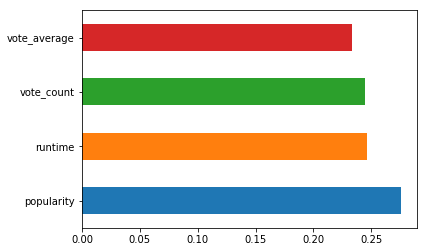

In [75]:
#### Here is the 'sklearn.ensemble.ExtraTreesClassifier' to confirm the feature importance on highest revenue_adj.

X = df_highest_revenue_adj.iloc[:,[7,12,14,15]]  #independent columns
y = df_highest_revenue_adj.iloc[:,10]    #target column # revenue

model = ExtraTreesClassifier()
model.fit(X,y)
print("\n\tGRAPH 2: Feature importance\n")

feat_importances = pd.Series(model.feature_importances_, index=X.columns)

axes = feat_importances.nlargest(10).plot(kind='barh')
axes.xaxis.set_label('Feature Importance')
axes.set_label('Feature Importance')
#plt.show()



**Observations:**
    * The features that influence the highest revenue are shown in the graph.

**Next Step:**
    * Do additional research

##  Additional Research: Using Independent variables

In the below sections we will review the Independent variables on the highest revenue dataset

##  Additional Research: 1.  Top Directors making high revenue movies

In [76]:
## Group by 'director' and find the max of revenue_adj.  
## Then sort values in decending order

cols = ['director']

print("\n\tTABLE 2: Top Directors\n")

df.groupby(cols).revenue_adj.max().sort_values(ascending=False).head(20)




	TABLE 2: Top Directors



director
William Friedkin                                     2.167325e+09
Steven Spielberg                                     1.907006e+09
Irwin Winkler                                        1.583050e+09
Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman    1.574815e+09
Wolfgang Reitherman                                  1.345551e+09
Robert Wise                                          1.129535e+09
Michael Bay                                          1.089358e+09
Andrew Adamson|Kelly Asbury|Conrad Vernon            1.061904e+09
Richard Donner                                       1.003539e+09
Terence Young                                        9.771535e+08
Sam Raimi                                            9.369017e+08
M. Night Shyamalan                                   8.807390e+08
John Badham                                          8.530813e+08
Jerry Zucker                                         8.427938e+08
Chris Miller|Raman Hui                               8.402392e+08
C

**Observations:**
    * The above table shows the top movie directors making high revenue movies  

**Next Step:**
    * Do additional research

##  Additional Research: 2. Top Movie Titles making high revenue

In [77]:
## Group by 'original_title' and find the max of revenue_adj.  
## Then sort values in decending order

print("\n\tTABLE 3: Top Movies\n")

cols = ['original_title']


df.groupby(cols).revenue_adj.max().sort_values(ascending=False).head(20)




	TABLE 3: Top Movies



original_title
The Exorcist                           2.167325e+09
Jaws                                   1.907006e+09
The Net                                1.583050e+09
One Hundred and One Dalmatians         1.574815e+09
Jurassic Park                          1.388863e+09
The Jungle Book                        1.345551e+09
The Sound of Music                     1.129535e+09
Close Encounters of the Third Kind     1.092965e+09
Transformers: Dark of the Moon         1.089358e+09
Shrek 2                                1.061904e+09
Superman                               1.003539e+09
Thunderball                            9.771535e+08
Spider-Man 3                           9.369017e+08
Spider-Man 2                           9.048154e+08
The Sixth Sense                        8.807390e+08
Saturday Night Fever                   8.530813e+08
Transformers: Revenge of the Fallen    8.500129e+08
Ghost                                  8.427938e+08
Shrek the Third                        8.402392e+

**Observations:**
    * The above table shows the top movie making high revenue movies  

**Next Step:**
    * Do additional research

##  Additional Research: 3. Top Genres making high revenue

In [78]:

## Group by 'original_title' and find the max of revenue_adj.  
## Then sort values in decending order

print("\n\tTABLE 4: Top Genres\n")

cols = ['genres']

df.groupby(cols).revenue_adj.max().sort_values(ascending=False).head(20)



	TABLE 4: Top Genres



genres
Thriller           2.167325e+09
Horror             2.167325e+09
Drama              2.167325e+09
Adventure          1.907006e+09
Action             1.583050e+09
Crime              1.583050e+09
Mystery            1.583050e+09
Animation          1.574815e+09
Family             1.574815e+09
Comedy             1.574815e+09
Science Fiction    1.388863e+09
Romance            1.129535e+09
Music              1.129535e+09
Fantasy            1.061904e+09
War                7.731786e+08
Western            7.079615e+08
History            6.445564e+08
Documentary        1.375112e+08
TV Movie           5.838910e+07
Foreign            4.010470e+07
Name: revenue_adj, dtype: float64

**Observations:**
    * The above table shows the top genres making high revenue movies  

**Next Step:**
    * Do additional research

##  Additional Research: 4. Years making high revenue

In [79]:
## Group by 'release_year' and find the max of revenue_adj.  
## Then sort values in decending order

print("\n\tTABLE 5: Top Years\n")

cols = ['release_year']

df.groupby(cols).revenue_adj.max().sort_values(ascending=False).head(20)




	TABLE 5: Top Years



release_year
1973.0    2.167325e+09
1975.0    1.907006e+09
1995.0    1.583050e+09
1961.0    1.574815e+09
1993.0    1.388863e+09
1967.0    1.345551e+09
1965.0    1.129535e+09
1977.0    1.092965e+09
2011.0    1.089358e+09
2004.0    1.061904e+09
1978.0    1.003539e+09
2007.0    9.369017e+08
1999.0    8.807390e+08
2009.0    8.500129e+08
1990.0    8.427938e+08
2012.0    7.873380e+08
1970.0    7.660726e+08
2010.0    7.526009e+08
2013.0    7.382306e+08
1989.0    7.235566e+08
Name: revenue_adj, dtype: float64

**Observations:**
    * The above table shows the top years making high revenue movies  

**Next Step:**
    * Do additional research

##  Additional Research: 5.  Combined Year, Director and Movie making high revenue

In [80]:
## Group by release_year', 'director', 'original_title' and find the max of revenue_adj.  
## Then sort values in decending order


print("\n\tTABLE 6: Top Combined Year, Director and Movie\n")

cols = ['release_year', 'director', 'original_title']


df.groupby(cols).revenue_adj.max().sort_values(ascending=False).head(20)




	TABLE 6: Top Combined Year, Director and Movie



release_year  director                                           original_title                     
1973.0        William Friedkin                                   The Exorcist                           2.167325e+09
1975.0        Steven Spielberg                                   Jaws                                   1.907006e+09
1995.0        Irwin Winkler                                      The Net                                1.583050e+09
1961.0        Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman  One Hundred and One Dalmatians         1.574815e+09
1993.0        Steven Spielberg                                   Jurassic Park                          1.388863e+09
1967.0        Wolfgang Reitherman                                The Jungle Book                        1.345551e+09
1965.0        Robert Wise                                        The Sound of Music                     1.129535e+09
1977.0        Steven Spielberg                                   Close Encounter

##  Additional Research:6. Dependent Variables - Higher vote_count when 'genres' are 'Adventure', 'Action', Science Fiction'

In [81]:
## Identify all top movie titles ('original_title')
## Then, from the 'unexploded' dataframe, identify rows matching the Top movie titles sorted by 'vote_count'

cols = ['original_title']

print("\n\tTABLE 7: Dependent Variable 1\n")

## First Find Top Titles
df_toptitles = list(df.groupby(cols,group_keys=True,sort=True,as_index=False ).revenue_adj.max().sort_values(by=['revenue_adj'],ascending=False).head(50).original_title)
#df_toptitles

## Then, from the 'unexploded' dataframe, identify rows matching the Top movie titles sorted by 'vote_average'
(df_unexploded[df_unexploded['original_title'].isin(df_toptitles)]).iloc[:,[0,2,9,10,12,13,14]].sort_values(by=['vote_count'],ascending=False)



	TABLE 7: Dependent Variable 1



,popularity,original_title,runtime,genres,vote_count,vote_average,release_year
1582,2.571099,The Hunger Games,142,Science Fiction|Adventure|Fantasy,7080,6.7,2012
2145,0.522347,Fast & Furious 6,130,Action|Thriller|Crime,4368,6.6,2013
4110,2.204926,Jurassic Park,127,Adventure|Science Fiction,3169,7.4,1993
2892,0.890557,Transformers,144,Adventure|Science Fiction|Action,2752,6.6,2007
2667,1.304553,Spider-Man 2,127,Action|Adventure|Fantasy,2735,6.4,2004
1266,0.760503,Transformers: Dark of the Moon,154,Action|Science Fiction|Adventure,2456,6.1,2011
1996,2.643496,Monsters University,104,Animation|Family,2251,7.0,2013
433,0.813323,Transformers: Revenge of the Fallen,150,Science Fiction|Action|Adventure,2230,6.0,2009
2820,2.520912,Spider-Man 3,139,Fantasy|Action|Adventure,2083,5.8,2007
737,2.578731,The Sixth Sense,107,Mystery|Thriller|Drama,1753,7.5,1999


**Observations:**
    * Manually reviewing the genere column shows coorelation of genere('Adventure', 'Action', Science Fiction') to vote_count. 

**Next Step:**
    * Do additional research

##  Additional Research:7. Dependent Variables - Higher vote_average when 'genres' are 'Drama', 'Science Fiction', 'Horror' or 'Thriller'

In [82]:
## Identify all top movie titles ('original_title')
## Then, from the 'unexploded' dataframe, identify rows matching the Top movie titles sorted by 'vote_average'

cols = ['original_title']
print("\n\tTABLE 8: Dependent Variable 2\n")

## First Find Top Titles
df_toptitles = list(df.groupby(cols,group_keys=True,sort=True,as_index=False ).revenue_adj.max().sort_values(by=['revenue_adj'],ascending=False).head(50).original_title)
# df_toptitles

(df_unexploded[df_unexploded['original_title'].isin(df_toptitles)]).iloc[:,[0,2,9,10,12,13,14]].sort_values(by=['vote_average'],ascending=False) 




	TABLE 8: Dependent Variable 2



,popularity,original_title,runtime,genres,vote_count,vote_average,release_year
4310,0.863156,The Sting,129,Comedy|Crime|Drama,304,7.7,1973
4213,2.227230,The Graduate,106,Comedy|Drama|Romance,426,7.5,1967
737,2.578731,The Sixth Sense,107,Mystery|Thriller|Drama,1753,7.5,1999
3800,1.459821,Rain Man,133,Drama,934,7.4,1988
4110,2.204926,Jurassic Park,127,Adventure|Science Fiction,3169,7.4,1993
4012,1.695911,Dances with Wolves,181,Adventure|Drama|Western,585,7.3,1990
3967,2.563191,Jaws,124,Horror|Thriller|Adventure,1415,7.3,1975
3990,1.987819,Mary Poppins,139,Comedy|Music|Family|Fantasy,613,7.2,1964
4335,1.313676,The Sound of Music,174,Drama|Family|Music|Romance,620,7.2,1965
4305,2.010733,The Exorcist,122,Drama|Horror|Thriller,1113,7.2,1973


**Observations:**
    * Manually reviewing the genere column shows coorelation of genere('Drama', 'Action', Science Fiction') to vote_average. 

**Next Step:**
    * Do additional research

<a id='conclusions'></a>
## Conclusions

This project -  Investiage_a_Dataset project analyzed the TMDb_movies datset by obtaining the data, performing review, cleanup and improving the dataset. The goal of the project were to answer 

1. Which Genres are most popular year to year ?
2. What are the properties associated with movies that have high revenues ?


The **'TABLE 1: Genres popular each year'** answeres the first question 

The **'GRAPH 1: Compare Mean values for Features'** and **'GRAPH 2: Feature importance'** answers the second question

The 'Additional Research:' sections analysis independent features on high revenue dataset.  

Each step is documented showing the 'Observed' and 'Next Step' to guide the analysis process.  Also, each analysis shares relevent infographics (Graphs and Table) to share detail information on the analysis.  This Analysis also documents 'References' in the Appendix section below. 

### Limitations

The following issues were noted in the dataset that has caused limitations to our analysis: 


I. Budget and Budget_adj column

1. The Budget and Budget_adj column had greater mismatch of unique values for budget = 555, and budget_adj = 2614  (++See In [8]:).
2. Also, this Budget and Budget_adj column had 5691 rows having a value of 0.0. which would have resulted in 54% drop in our dataset (++See In [18]:)

Due to the above 2 issues the analysis choose to drop the columns from being considered.

II. Revenue and Revenue_adj 
1. This had about 6012 rows having 0.0 value. Since we cannot make assumptions on the the revenue, these rows were dropped causing significatly reduced reduction from our Analysis dataset   (++See In [21]:)

III. Outliers
Outliers in columns like Popularity resulted in 325 dropped rows. Refererence to detail specification showig the valid range woudl provide valuable guidance to our analysis. (++See In [15]:)

IV.  Ancillary columns show below have Null values. Correcting this values may provide helpful insight that could be used for indepth analysis (++See In [7]:)

***************************************************************************
                cast = 076
            homepage = 7930
            director = 044
             tagline = 2824
            keywords = 1493
            overview = 004
              genres = 023
production_companies = 1030

***************************************************************************


V. Merged values in columns
Columns like cast, production_companies have multiple values combined by '|'. Sufficient steps needs to taken to further flatten the values so that it could be further our analysis 

VI. Pandas version and Explode
Genere column has values joined by '|'. The latest version of Pands offers 'Explode'  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html method to flatten the dataset.  However, this method is Not availabe in the current version being used. The current version of pands seems to be   

    print(pd.__version__)

    '0.23.3'

(I) tried serveral built-in methods of melt, concat, merge, stack (see 'Appendix' below) to explode the data but was challengeing. Hence, resorted to building Python method. The performance impact for this dataset seems acceptable for the analysis.  (Have posted a question in 'Ask a Mentor' https://knowledge.udacity.com/questions/401379)


### Appendix

### Appendix  A: References

1. Udacity Course work: --> Data Analysis Process - Case study 1
2. Udacity Course work: --> Data Analysis Process - Case study 2
3. https://pandas.pydata.org/docs/index.html  --> All built-in method references
4. https://note.nkmk.me/en/python-pandas-version/ --> To see the Pandas version
5. https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/ --> To try the Exploding 
6. https://medium.com/@nmscott14/3-feature-selection-methods-e7ccd6dbf316  --> For Feature importance
    

### Appendix  B: Try split, melt, concat, merge, stack

In [83]:
print(pd.__version__)

0.23.3


**Observations:**
    * Old version of Pandas; Does not seem to have 'Explode' method that can be leveraged to flatten 'genres' 
    
**Next Step:**
    * Try split, melt, concat, merge, stack

##### Step 1 : Try split, melt, concat, merge, stack

In [84]:
## Trying various build-in pandas method

#df_unexploded.info()

## Try split()    <==
df_u2 = df_unexploded.copy(deep=True)
df_u2.genres.str.split(pat='|', expand=True)

## Try concat()   <==
######.  df_u3 = pd.concat([df_u2,df_u2.genres.str.split(pat='|', expand=True)])


## Try melt()     <==
#pd.melt(df_u2, id_vars=df_u2.columns, value_vars=df_u2.genres.str.split(pat='|', expand=True))
#df_u3 = pd.melt(df_u2, id_vars=df_u2.columns, value_vars=df_u2.genres.str.split(pat='|', expand=True))
#df_u3[df_u3.original_title == 'Point Break']
#df_u3.query("orignal_title == 'Point Break'")
 
## Try Stack()     <==
df_genre=pd.DataFrame(df_unexploded.genres.str.split(pat='|',expand=True),index=df_u2.index).stack()
#df_genre

## Try Merge       <==
#df3 = pd.merge(df_genre.to_frame(),df_unexploded.to_frame())
#df3


**Observations:**
    * Had challenges to merge the flatten the 'genres' column and merge the dataset. 

**Next Step:**
    * Create a Python steps or function to Explode data.

## Submitting your Project 

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0